## Project Title: Visualizing the Impact of CO2 Emissions on Communities and Climates

### Description:

#### Overview: 
This project focuses on visualizing global CO2 emissions data to provide insights into trends, patterns, and the impact of human activities on climate change. Through interactive data visualization techniques, we aim to offer a comprehensive view of CO2 emissions over time, with a focus on their consequences for communities and the environment.

#### Statement: 
CO2 emissions play a pivotal role in shaping our world, impacting not only climate but also the communities and ecosystems within it. This project aims to explore and visualize the influence of CO2 emissions on communities and climates.

#### Solution:
Create a data visualization project that effectively communicates the relationship between CO2 emissions, climate change, and their effects on communities. We'll highlight current trends and emphasize the importance of sustainable practices and climate action.

### File Path:

datasets/annual-co-emissions-by-region.csv

datasets/annual-co2-emissions-per-country.csv

datasets/co-emissions-per-capita.csv

datasets/global-co2-fossil-plus-land-use.csv

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl 
import matplotlib.pyplot as plt # using this to plot
# import basemap

import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Set the relative path to the dataset folder
dataset_path = os.getcwd() + "/datasets"

# Display the contents of the dataset folder
print(os.listdir(dataset_path))


Current Working Directory: d:\CECS450-project
['annual-co-emissions-by-region.csv', 'annual-co2-emissions-per-country.csv', 'CARBON BRIEF DATA 1.5C vs. 2C and beyond.xlsx', 'co2-emissions-per-capita.csv', 'cumulative-co-emissions.csv', 'cumulative-co2-emissions-region.csv', 'global-co2-fossil-plus-land-use.csv', 'global_temperture_anomalies.csv', 'number-of-natural-disaster-events.csv', 'share-of-cumulative-co2.csv']


## What is **Climate Change**?

Climate change, often referred to as global warming, or the greenhouse effect, is a change in the Earth's average temperture and cycles of weather patterns caused by human activities over a long period of time.

This is primarily because of the emission of greenhouse gases (GHGs) such as carbon dioxide, methane, and nitrous oxide. These GHGs act as a blanket in the Earth's atmosphere, trapping heat and causing the Earth's temperature to rise. This increase in temperature can result in extreme weather events, rising sea levels, and disruptions to ecosystems.

In [3]:
# Temperture Anomaly of the World over the year
# where i get it: google search and https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series
file_name = 'global_temperture_anomalies.csv'

# Load the dataset
file_path = os.path.join(dataset_path, file_name)

# read in the data
temp_abnormal = pd.read_csv(file_path, header=0)
temp_abnormal = pd.DataFrame(temp_abnormal)
temp_abnormal.head()

,Year,Anomaly
0,1850,-0.11
1,1851,-0.02
2,1852,-0.06
3,1853,-0.14
4,1854,-0.01


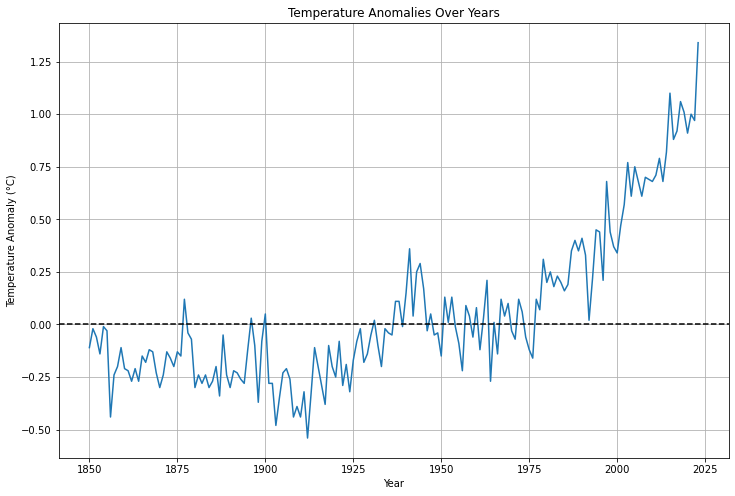

In [4]:
years = np.array(temp_abnormal['Year'])
anomalies = np.array(temp_abnormal['Anomaly'])

above_zero = temp_abnormal[temp_abnormal['Anomaly'] > 0]
zero_yrs=np.array(above_zero['Year'])
zero_anomalies = np.array(above_zero['Anomaly'])

# plot the graph
plt.figure(figsize=(12, 8))
plt.plot(years,anomalies, linestyle='-')
plt.axhline(y=0, color='black', linestyle='--', label='0 Degrees')
# plt.plot(zero_yrs, zero_anomalies, marker='o', linestyle='-', color='red')
# plt.fill_between(zero_yrs, zero_anomalies, color='red', alpha=0.3)
plt.title('Temperature Anomalies Over Years')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.show()


Since 1850, scientists have diligently documented global surface temperatures using thermometer-based records. The data trends depict a consistent rise in temperatures, indicating a warming trend across the planet. This observed temperature increase is a clear indication of the changing climate.

## Why is it a **Problem**?

Over the course of millions of years, species undergo gradual adaptations to survive within their specific environmental conditions. A stable climate is vital for this intricate process, fostering an environment where life forms can flourish and evolve. However, when the climate undergoes rapid changes, organisms face a challenge: the limited time available for adaptation to new conditions. Consequently, these swift alterations may render certain species unable to cope, threatening their survival in the changed environment.


Changes in the climate lead to disturbances in weather patterns, amplifying the frequency of extreme weather events. These encompass heightened hurricane activity, prolonged droughts, and escalated occurrences of floods. Concurrently, the surge in global temperatures parallels a noticeable uptick in documented natural disasters.

In [5]:
file_name = 'number-of-natural-disaster-events.csv'

# Load the dataset
file_path = os.path.join(dataset_path, file_name)

# read in the data
num_disasters = pd.read_csv(file_path, header=0)
num_disasters = pd.DataFrame(num_disasters)
num_disasters.head()

,Entity,Code,Year,Number of reported natural disasters
0,All disasters,NaN,1900,6
1,All disasters,NaN,1901,1
2,All disasters,NaN,1902,10
3,All disasters,NaN,1903,12
4,All disasters,NaN,1904,4


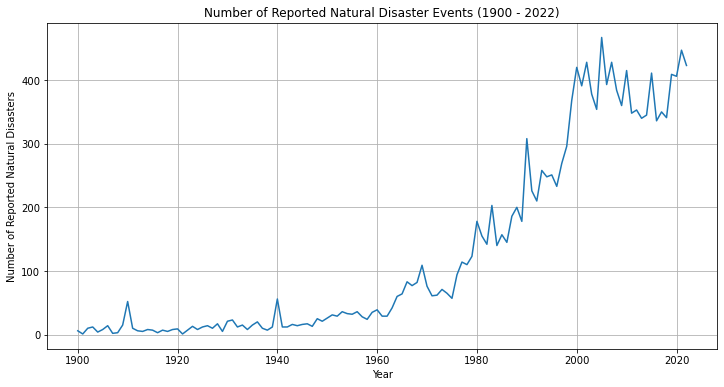

In [6]:
# process the data
all_disasters = num_disasters[num_disasters['Entity'] == 'All disasters' ]
all_disasters = all_disasters[all_disasters['Year'] != 2023]

yrs = np.array(all_disasters['Year'])
num = np.array(all_disasters['Number of reported natural disasters'])
# Plotting the number of reported natural disaster events
plt.figure(figsize=(12, 6))
plt.plot(yrs, num, linestyle='-')

plt.title('Number of Reported Natural Disaster Events (1900 - 2022)')
plt.xlabel('Year')
plt.ylabel('Number of Reported Natural Disasters')
plt.grid(True)
plt.show()

Over time, the graph shows us how reported natural disasters change each year. This data helps us understand how these events fluctuate and their potential connections to changes in the climate.

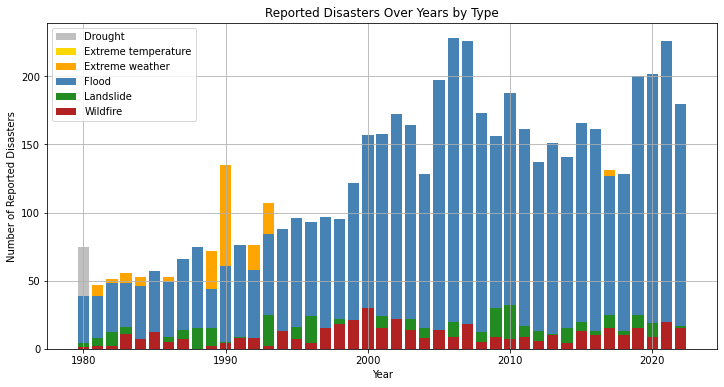

In [7]:
disasters = ['Drought', 'Extreme temperature','Flood', 'Landslide', 'Wildfire', 'Extreme weather']

# Filter the DataFrame to include only the selected disaster types and years from 1980 to 2022
filtered = num_disasters[(num_disasters['Entity'].isin(disasters)) & (num_disasters['Year'] >= 1980) & (num_disasters['Year'] <= 2022)]

# Plotting the bar graph with different colors for each section
plt.figure(figsize=(12, 6))

colors = ['silver', 'gold','orange', 'steelblue', 'forestgreen', 'firebrick']  # Specify colors for each category

i=0
for type, group in filtered.groupby('Entity'):
    plt.bar(group['Year'], group['Number of reported natural disasters'], label=type, color=colors[i])
    i+=1
    
plt.xlabel('Year')
plt.ylabel('Number of Reported Disasters')
plt.title('Reported Disasters Over Years by Type')
plt.legend()
plt.grid(True)
plt.show()

Regardless of our pace in taking action, the ongoing increase in global temperature is inevitable due to the presence of greenhouse gases already in the atmosphere. The challenges we currently face are expected to exacerbate as a consequence.

> How much difference do you think a 0.5°C increase in global temperature can make?


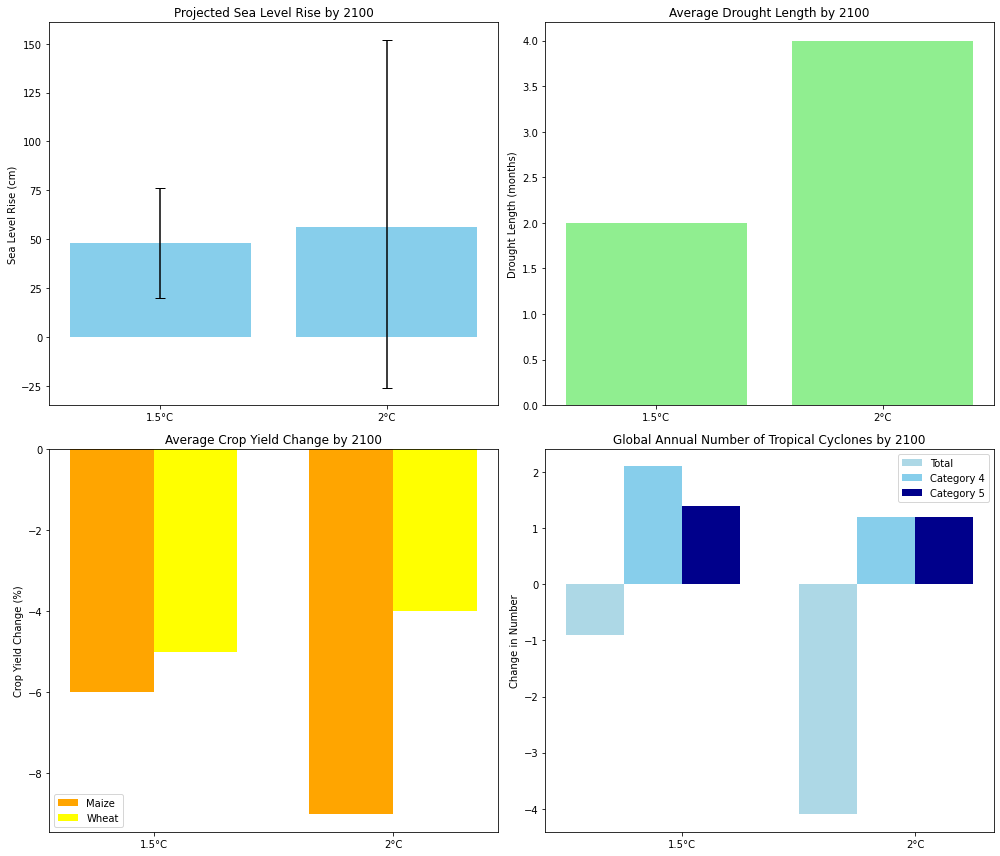

In [64]:
# These Data is taken from the "CARBON BRIEF DATA 1.5C vs. 2C and beyond" spreadsheet 
# Sea level rise data
scenarios_sea_level = ['1.5°C', '2°C']
sea_level_rise = [48, 56]
sea_level_error_bars = [(28, 82), (28, 96)]

# Drought data
scenarios_drought = ['1.5°C', '2°C']
drought_length = [2, 4]

# Crop yield change data
scenarios_yield = ['1.5°C', '2°C']
maize_yield = [-6, -9]
wheat_yield = [-5, -4]

# Global annual number of tropical cyclones data
scenarios_cyclones = ['1.5°C', '2°C']
total_cyclones = [-0.9, -4.1]
category4_cyclones = [2.1, 1.2]
category5_cyclones = [1.4, 1.2]

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plotting sea level rise
sea_level_x = np.arange(len(scenarios_sea_level))
axes[0, 0].bar(sea_level_x, sea_level_rise, yerr=sea_level_error_bars, capsize=5, label='Sea Level Rise', color='skyblue')
axes[0, 0].set_xticks(sea_level_x)
axes[0, 0].set_xticklabels(scenarios_sea_level)
axes[0, 0].set_ylabel('Sea Level Rise (cm)')
axes[0, 0].set_title('Projected Sea Level Rise by 2100')

# Plotting drought length
drought_x = np.arange(len(scenarios_drought))
axes[0, 1].bar(drought_x, drought_length, label='Drought Length', color='lightgreen')
axes[0, 1].set_xticks(drought_x)
axes[0, 1].set_xticklabels(scenarios_drought)
axes[0, 1].set_ylabel('Drought Length (months)')
axes[0, 1].set_title('Average Drought Length by 2100')

# Plotting crop yield change
yield_x = np.arange(len(scenarios_yield))
axes[1, 0].bar(yield_x, maize_yield, width=0.35, label='Maize', color='orange')
axes[1, 0].bar(yield_x + 0.35, wheat_yield, width=0.35, label='Wheat', color='yellow')
axes[1, 0].set_xticks(yield_x + 0.35 / 2)
axes[1, 0].set_xticklabels(scenarios_yield)
axes[1, 0].set_ylabel('Crop Yield Change (%)')
axes[1, 0].set_title('Average Crop Yield Change by 2100')
axes[1, 0].legend()

# Plotting tropical cyclones
cyclones_x = np.arange(len(scenarios_cyclones))
axes[1, 1].bar(cyclones_x, total_cyclones, width=0.25, label='Total', color='lightblue')
axes[1, 1].bar(cyclones_x + 0.25, category4_cyclones, width=0.25, label='Category 4', color='skyblue')
axes[1, 1].bar(cyclones_x + 0.5, category5_cyclones, width=0.25, label='Category 5', color='darkblue')
axes[1, 1].set_xticks(cyclones_x + 0.25 * 1.5)
axes[1, 1].set_xticklabels(scenarios_cyclones)
axes[1, 1].set_ylabel('Change in Number')
axes[1, 1].set_title('Global Annual Number of Tropical Cyclones by 2100')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


Increasing temperatures lead to rising sea levels. This surge in water levels poses a threat to coastal regions, eradicating habitats and forcing entire populations to flee from low-lying areas.

These plots depict projections for various environmental impacts based on different temperature scenarios by the year 2100.

* **Sea Level Rise**: As temperatures increase, sea levels are projected to rise. The bars illustrate the expected increase in sea level (in centimeters) for two different temperature scenarios (1.5°C and 2°C). The error bars show the range of uncertainty in these projections.

* **Drought Length**: The bar graph displays the average duration of droughts (in months) for the 1.5°C and 2°C temperature scenarios. A higher temperature is associated with longer periods of drought, impacting water availability and agricultural productivity.

* **Crop Yield Change**: The bar chart indicates the anticipated change in crop yields (in percentage) for maize and wheat crops under different temperature scenarios. Higher temperatures are predicted to result in decreased crop yields, affecting food production and global food security.

* **Global Annual Number of Tropical Cyclones**: The bars show the change in the number of tropical cyclones (both total and categorized as Category 4 and 5) under the 1.5°C and 2°C scenarios. The data suggest variations in the frequency and intensity of tropical cyclones, with higher temperatures potentially leading to a significant decrease in their numbers.

Each subplot highlights the potential consequences of different temperature scenarios on various environmental factors, emphasizing the critical need to address climate change to mitigate these impacts.







## **Annual** CO2 emissions

The emissions data presented here is based on the country where CO2 is produced (i.e., production-based CO2), rather than where the goods and services generating emissions are ultimately consumed. We also consider the disparity between each country's production and consumption-based emissions (trade-adjusted emissions).

Asia stands out as the largest emitter, accounting for a significant 53% of global emissions. Given that it's home to 60% of the world's population, per capita emissions in Asia are slightly below the global average.

China, by a substantial margin, emerges as the leading emitter in Asia and the world, contributing nearly 10 billion tonnes of CO2 annually, which is more than one-quarter of global emissions.

North America, largely represented by the USA, comes in as the second-largest regional emitter, responsible for 18% of global emissions. Europe follows closely behind, contributing 17% of global emissions. In our analysis, we group the 28 countries of the European Union, as they often work together to set collective targets. For a detailed breakdown of emissions by individual EU countries, you can explore the interactive maps that follow.

In contrast, Africa and South America are relatively minor emitters, each accounting for 3-4% of global emissions. Their emissions are comparable in size to those produced by international aviation and shipping. It's worth noting that aviation and shipping emissions are not included in national or regional emissions data due to ongoing debates over the allocation of emissions that cross international borders. Questions like whether they belong to the departure country or the country of origin and how connecting flights are accounted for contribute to the complexity of international aviation and shipping agreements, which are discussed in detail by Carbon Brief."

In [3]:
import plotly.express as px
# Update the file name accordingly
file_name = 'annual-co2-emissions-per-country.csv'

# Load the dataset
file_path = os.path.join(dataset_path, file_name)

# read in the data
annual_co2_per_country = pd.read_csv(file_path, header=0)
annual_co2_per_country.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


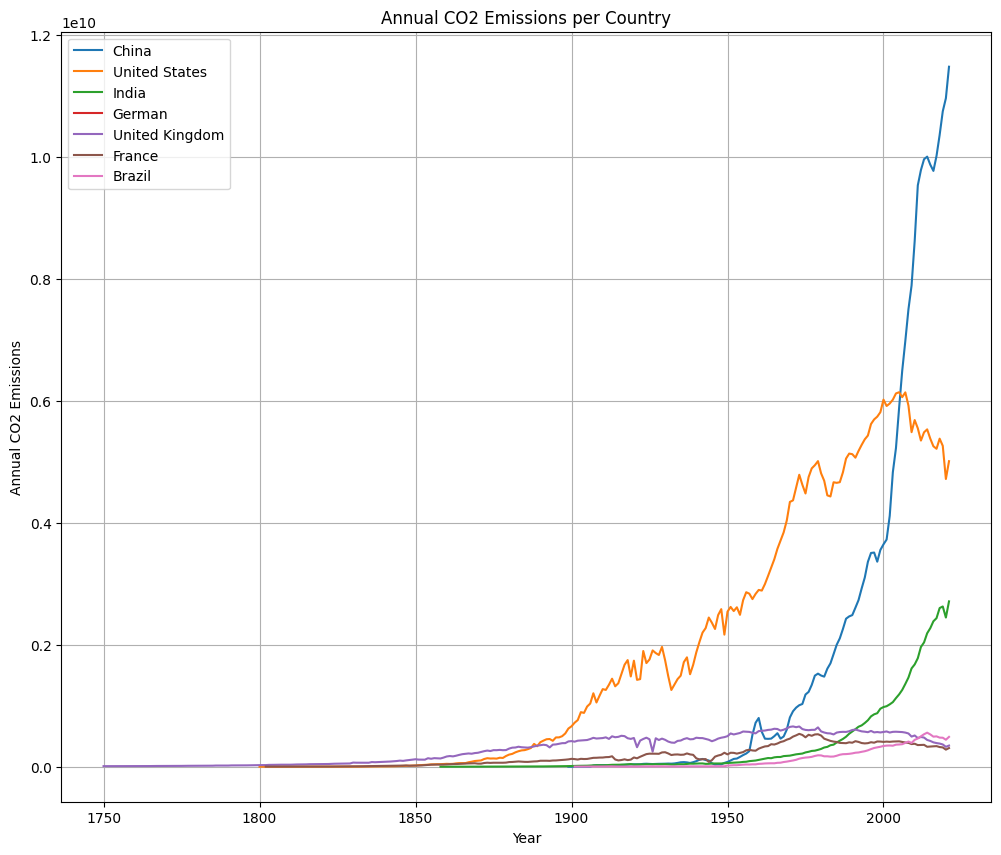

In [5]:
annual_co2_per_country = pd.DataFrame(annual_co2_per_country)

# choose a few specific countries
countries = ['China', 'United States', 'India', 'German', 'United Kingdom', 'France', 'Brazil']

# create a new dataframe with only the chosen countries
countries_data = annual_co2_per_country[annual_co2_per_country['Entity'].isin(countries)]


plt.figure(figsize=(12, 10)) # Adjust the values as needed

# Group the data by country and plot individual lines for each country
for country in countries:
    country_data = countries_data[countries_data['Entity'] == country]
    yrs = np.array(country_data['Year'])
    annual = np.array(country_data['Annual CO₂ emissions'])
    plt.plot(yrs, annual, label=country)

plt.title('Annual CO2 Emissions per Country')
plt.xlabel('Year')
plt.ylabel('Annual CO2 Emissions')
plt.legend()
plt.grid(True)
plt.show()


#### Emission Amounts After 1990 by Country

In [ ]:
annual_co2_per_country.sort_values(by="Annual CO₂ emissions") # sort value annual CO2 emissions

,Entity,Code,Year,Annual CO₂ emissions
9371,Europe (excl. EU-28),NaN,1823,0.000000e+00
25332,Singapore,SGP,1806,0.000000e+00
25333,Singapore,SGP,1807,0.000000e+00
25334,Singapore,SGP,1808,0.000000e+00
25335,Singapore,SGP,1809,0.000000e+00
...,...,...,...,...
31078,World,OWID_WRL,2014,3.557754e+10
31081,World,OWID_WRL,2017,3.609674e+10
31082,World,OWID_WRL,2018,3.682651e+10
31083,World,OWID_WRL,2019,3.708256e+10


In order to have a cleaner chart, I deleted rows that includes "World".

In [ ]:
annual_co2_top = annual_co2_per_country[(annual_co2_per_country["Annual CO₂ emissions"] > 600000000) & (annual_co2_per_country["Year"]>1990)] # get value annual Co2 > 600000000 and after 1990 by Country
drops = annual_co2_top[annual_co2_top["Entity"] == "World"].index # get value country is "World" in table 
df_top = annual_co2_top.drop(drops) # delete the country is world in the table
fig = px.line(df_top, x='Year', y='Annual CO₂ emissions', color='Entity', title="Emission Amounts After 1990 by Country") # draw graph
fig.show()

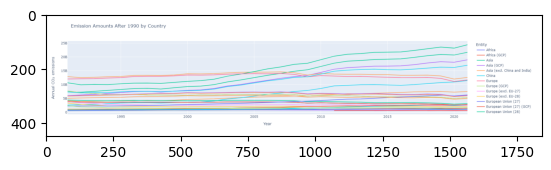

<Figure size 1800x1000 with 0 Axes>

In [ ]:
import matplotlib.image as mpimg

img = mpimg.imread('images/emission-amount-after-1990.png')
imgplot = plt.imshow(img)
plt.figure(figsize=(18, 10)) 
plt.show()

According to chart above, regions with high GDP has decreased CO2 emissions after 2005.

However, China has increased CO2 emission, and this value is much higher than developed countries.

#### Total Co2 Emissions by US

In [ ]:
import seaborn as sns

data_emissions = annual_co2_per_country # copy data
data_emissions.info()
data_emissions.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                31349 non-null  object 
 1   Code                  24974 non-null  object 
 2   Year                  31349 non-null  int64  
 3   Annual CO₂ emissions  31349 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 979.8+ KB


Entity                     0
Code                    6375
Year                       0
Annual CO₂ emissions       0
dtype: int64

In [ ]:
data_emissions.drop('Code', axis = 1, inplace=True) # delete column "Code" in table
data_emissions.rename(columns={'Annual CO₂ emissions':'CO2'}, inplace=True) # remane column Annual CO₂ emissions to CO2

In [ ]:
def visualise_country(country):
    # Creating a seperate dataframe
    data_emissions_vis = data_emissions[data_emissions['Entity'] == country]
    tot_yr = data_emissions_vis.Year.max() - data_emissions_vis.Year.min()
    tot_em = data_emissions_vis.CO2.sum()
    print(f"Total Co2 Emissions by {country} in {tot_yr} years: {'{:.2f}'.format(tot_em)} tonnes")
    
    # Plot
    fig = sns.lineplot(data=data_emissions_vis, x="Year", y='CO2')
    plt.title('Co2 Emissions by ' + country + ' in '+str(tot_yr)+' years \n', fontsize=20)
    plt.ylabel('Co2 Emissions')

Total Co2 Emissions by United States in 221 years: 421906856549.98 tonnes


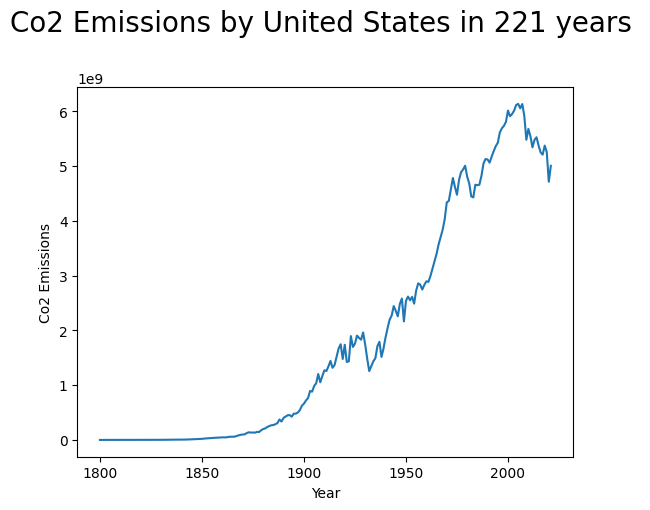

In [ ]:
visualise_country('United States')

# **Per capita** CO2 emissions

The world’s largest per capita CO2 emitters are the major oil producing countries; this is particularly true for those with relatively low population size. Most are in the Middle East: In 2017 Qatar had the highest emissions at 49 tonnes (t) per person, followed by Trinidad and Tobago (30t); Kuwait (25t); United Arab Emirates (25t); Brunei (24t); Bahrain (23t) and Saudi Arabia (19t).

However, many of the major oil producers have a relatively small population meaning their total annual emissions are low. More populous countries with some of the highest per capita emissions – and therefore high total emissions – are the United States, Australia, and Canada. Australia has an average per capita footprint of 17 tonnes, followed by the US at 16.2 tonnes, and Canada at 15.6 tonnes.

This is more than 3 times higher than the global average, which in 2017 was 4.8 tonnes per person.

Since there is such a strong relationship between income and per capita CO2 emissions, we’d expect this to be the case: that countries with high standards of living would have a high carbon footprint. But what becomes clear is that there can be large differences in per capita emissions, even between countries with similar standards of living. Many countries across Europe, for example, have much lower emissions than the US, Canada or Australia. 

In [ ]:
import datetime as dt # datetime library

# Update the file name accordingly
file_name = 'co2-emissions-per-capita.csv'

# Load the dataset
file_path = os.path.join(dataset_path, file_name)
# read in the data
df_per_capita = pd.read_csv(file_path, header=0)
df_per_capita

,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.011266
2,Afghanistan,AFG,1951,0.012098
3,Afghanistan,AFG,1952,0.011946
4,Afghanistan,AFG,1953,0.013685
...,...,...,...,...
26910,Zimbabwe,ZWE,2017,0.650533
26911,Zimbabwe,ZWE,2018,0.783639
26912,Zimbabwe,ZWE,2019,0.723861
26913,Zimbabwe,ZWE,2020,0.676970


In [ ]:
# convert data
df_per_capita.drop('Code', axis = 1, inplace=True)
df_per_capita.rename(columns={'Entity':'Country Name', 'Annual CO₂ emissions (per capita)': 'CO2emissions'}, inplace=True)
df_stack = df_per_capita
df_stack['Year'] = pd.to_numeric(df_stack['Year'],errors='coerce')
df_stack


,Country Name,Year,CO2emissions
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.011266
2,Afghanistan,1951,0.012098
3,Afghanistan,1952,0.011946
4,Afghanistan,1953,0.013685
...,...,...,...
26910,Zimbabwe,2017,0.650533
26911,Zimbabwe,2018,0.783639
26912,Zimbabwe,2019,0.723861
26913,Zimbabwe,2020,0.676970


### Exploratory Data Analysis

#### Largest Average CO2 Emissions Per Capita

<Axes: xlabel='CO2emissions', ylabel='Country Name'>

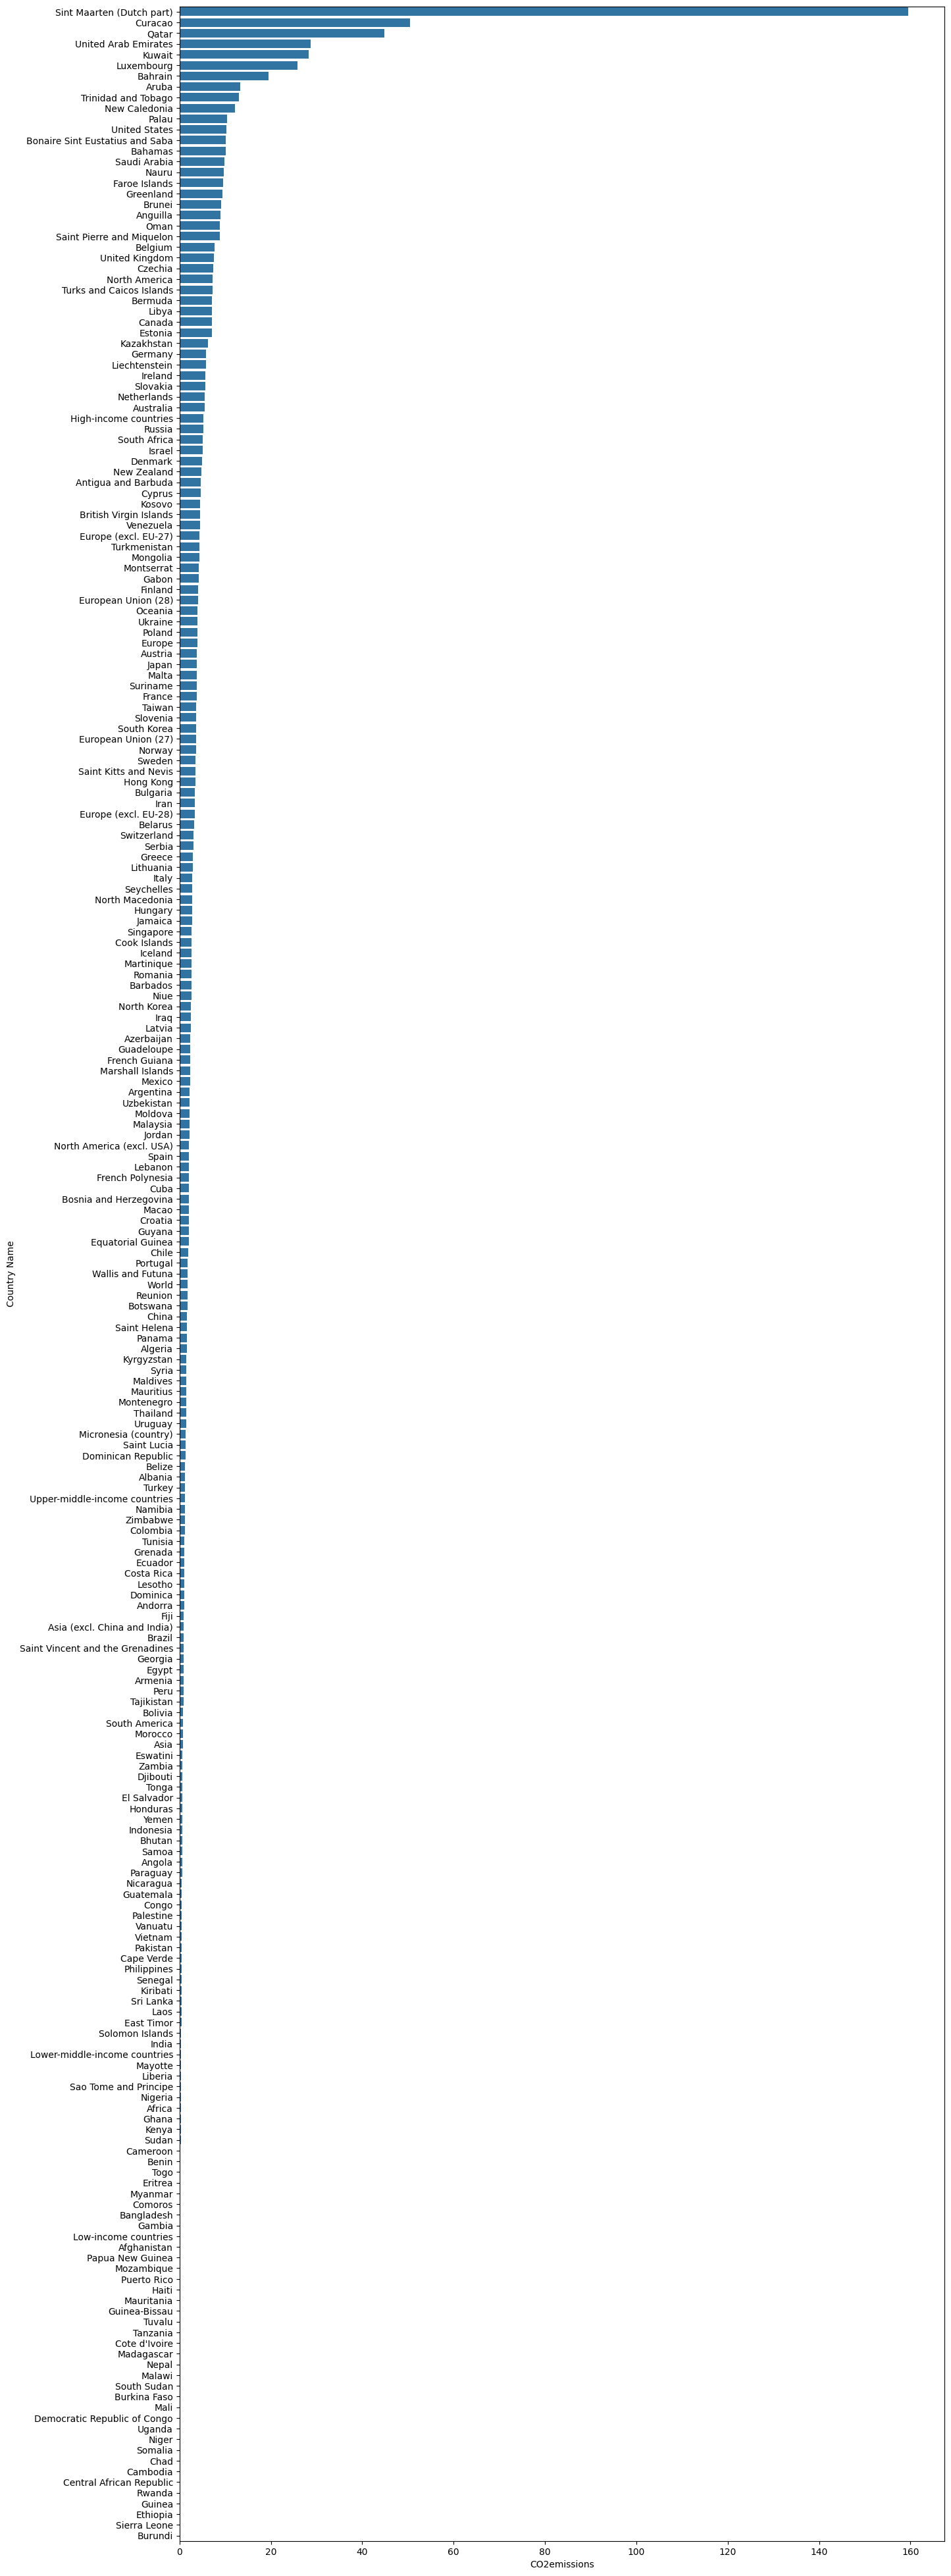

In [ ]:
df_plot = df_stack.groupby(by=['Country Name']).mean().sort_values(by=['CO2emissions'],ascending=False)
plt.figure(figsize=(15,50))
sns.barplot(y=df_plot.index,x=df_plot['CO2emissions'])

#### Largest CO2 Emissions Per Capita over the past 10 years

<Axes: xlabel='Country Name', ylabel='CO2emissions'>

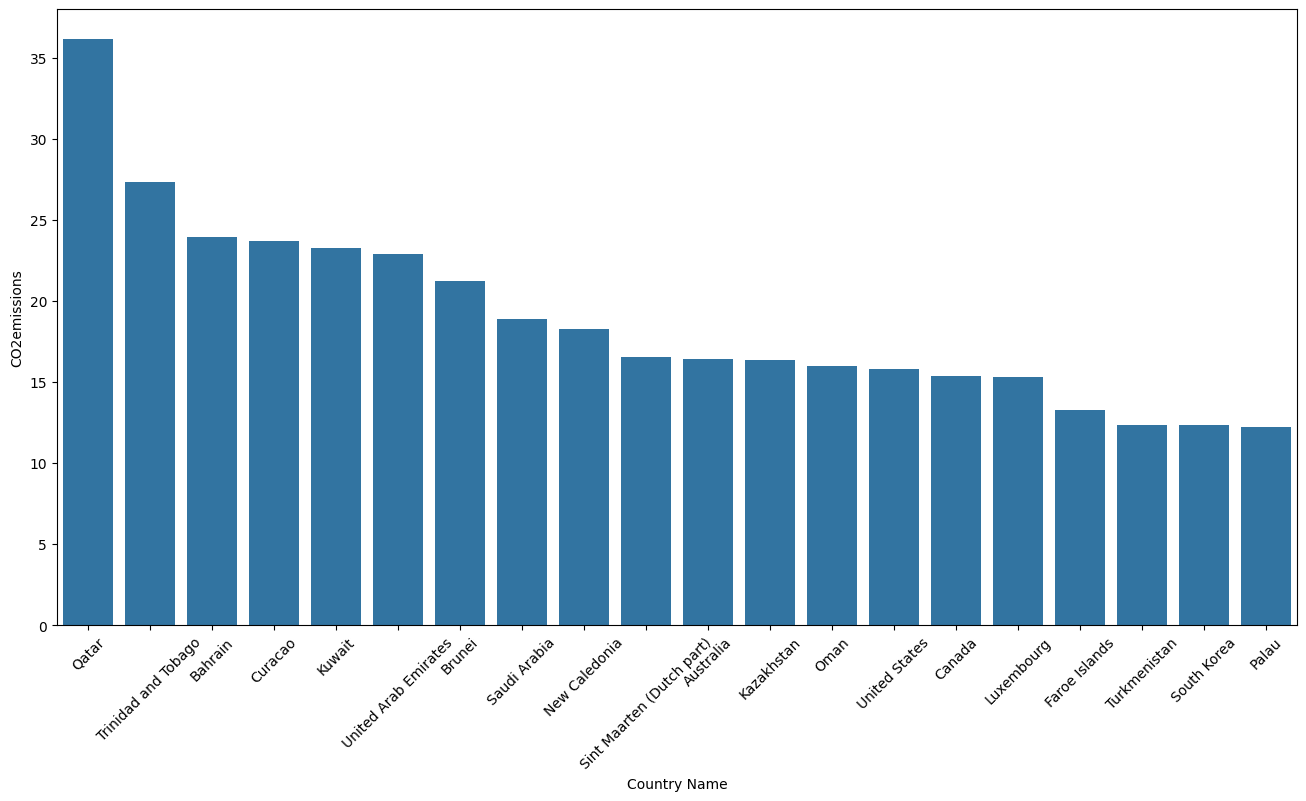

In [ ]:
year = dt.datetime.today().year
delta_years = 10
df_plot = df_stack[df_stack['Year']>(year-delta_years)].groupby(by=['Country Name']).mean().sort_values(by='CO2emissions',ascending=False).iloc[:20]
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.barplot(x=df_plot.index,y=df_plot['CO2emissions'])

#### Average CO2 Emissions per Capita Over Time

<Axes: xlabel='Year', ylabel='CO2emissions'>

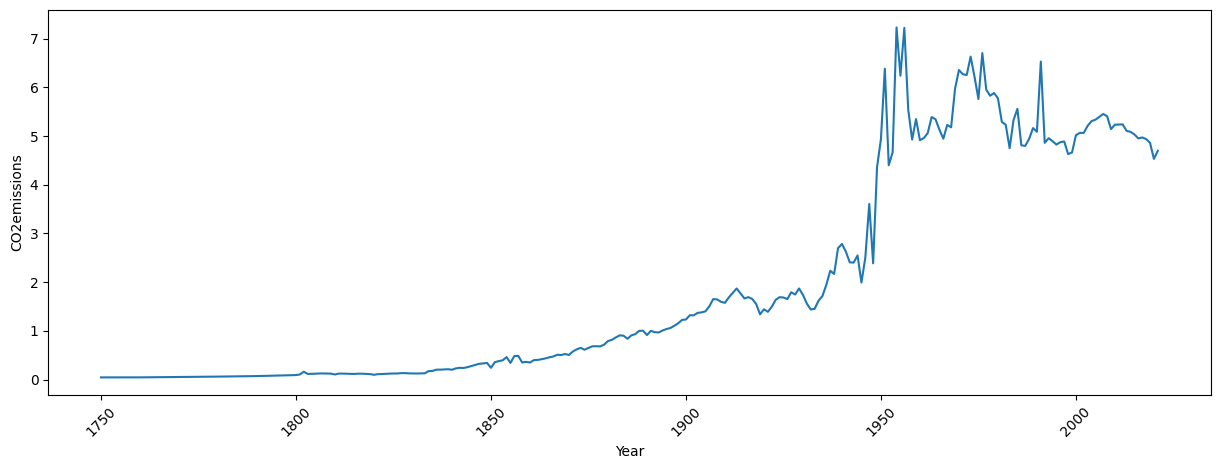

In [ ]:
df_plot = df_stack.groupby(by=['Year']).mean(numeric_only=True).sort_values(by=['CO2emissions'],ascending=False)
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.lineplot(x=df_plot.index,y=df_plot['CO2emissions'])

#### CO2 Emissions per Capita Over Time - Country Independent

<Axes: title={'center': 'United States CO2 Emissions per Capita Over Time'}, xlabel='Year', ylabel='CO2emissions'>

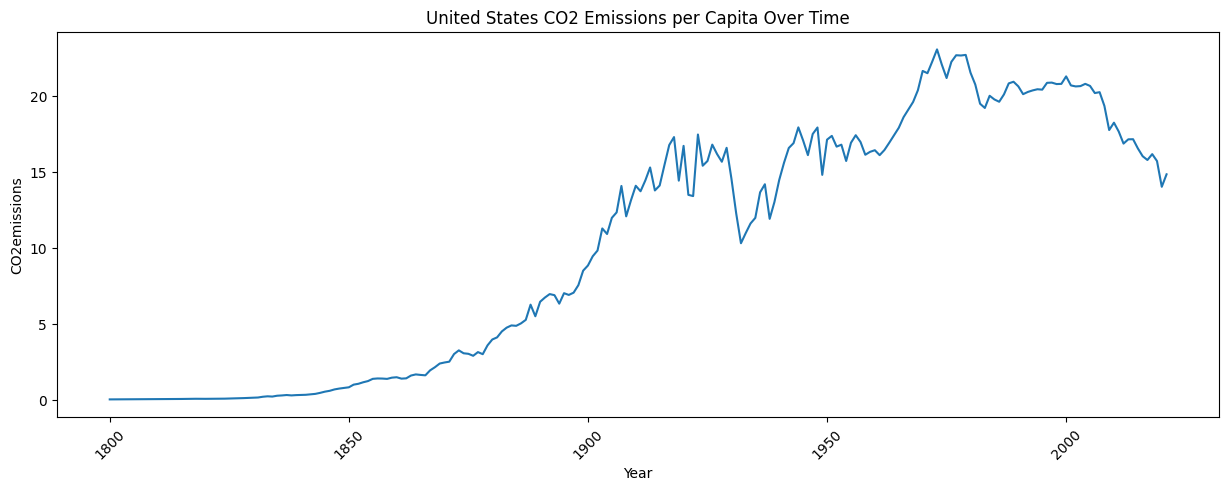

In [ ]:
country = 'United States'
df_plot = df_stack[df_stack['Country Name']==country].groupby(by=['Year']).mean(numeric_only=True).sort_values(by=['CO2emissions'],ascending=False)
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.title(f"{country} CO2 Emissions per Capita Over Time")
sns.lineplot(x=df_plot.index,y=df_plot['CO2emissions'])

From the data visualizations abbve, we are able to observe the following insights:

  - CO2 emissions rates are not distributed equally around the world

  - Large CO2 emitting countries (per capita) emit significantly more CO2 than lower emitter countries

  - Overall CO2 emissions have decreased from its peak in 1976

  - Overall CO2 emissions have stabilized and has recently been on the decline since 2006 in the recent years
  
  - The top CO2 emissions contributors appear to be mostly from middle eastern countries, followed by North American countries, and then eastern European countries.

# **Cumulative** CO₂ emissions

How has each region’s share of global cumulative CO2 emissions changed over time?

Up until 1950, more than half of historical CO2 emissions were emitted by Europe. The vast majority of European emissions back then were emitted by the United Kingdom; as the data shows, until 1882 more than half of the world’s cumulative emissions came from the UK alone. Over the century which followed, industrialization in the USA rapidly increased its contribution.It’s only over the past 50 years that growth in South America, Asia and Africa have increased these regions’ share of total contribution.

In [ ]:
# Update the file name accordingly
file_name = 'cumulative-co2-emissions-region.csv'

# Load the dataset
file_path = os.path.join(dataset_path, file_name)

# read in the data
cumulative_co2 = pd.read_csv(file_path, header=0)
cumulative_co2

,Entity,Code,Year,Cumulative CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,98928.0
2,Afghanistan,AFG,1951,190528.0
3,Afghanistan,AFG,1952,282128.0
4,Afghanistan,AFG,1953,388384.0
...,...,...,...,...
29351,Zimbabwe,ZWE,2017,753403000.0
29352,Zimbabwe,ZWE,2018,765198500.0
29353,Zimbabwe,ZWE,2019,776313150.0
29354,Zimbabwe,ZWE,2020,786921000.0


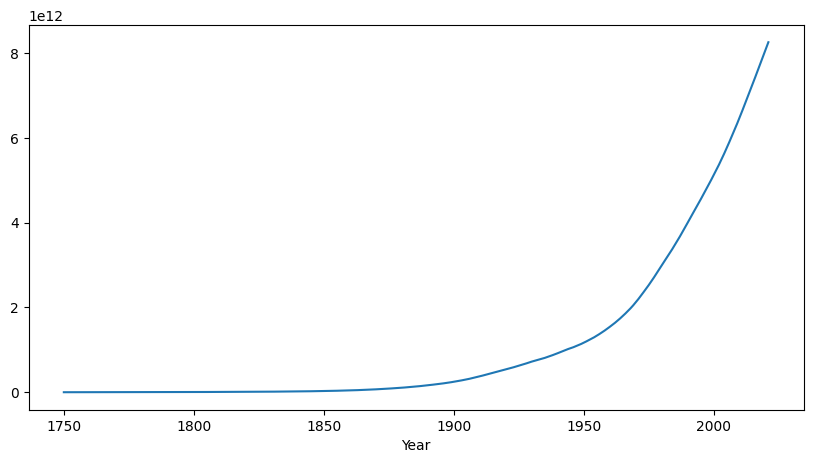

In [ ]:
cumulative_co2.rename(columns={'Cumulative CO₂ emissions': 'CO2emissions'}, inplace=True)
cumulative_co2.groupby('Year')['CO2emissions'].sum().plot(figsize=(10,5));

We can see that cumulative CO2 emission inceresed rapidly. Accordint to United States Environmental Protection Agency,

"Global carbon emissions from fossil fuels have significantly increased since 1900. Since 1970, CO2 emissions have increased by about 90%, with emissions from fossil fuel combustion and industrial processes contributing about 78% of the total greenhouse gas emissions increase from 1970 to 2011. Agriculture, deforestation, and other land-use changes have been the second-largest contributors. Emissions of non-CO2 greenhouse gases have also increased significantly since 1900."

#### Top 30 cumulative CO2 emission countries in 2020

<Axes: xlabel='Entity'>

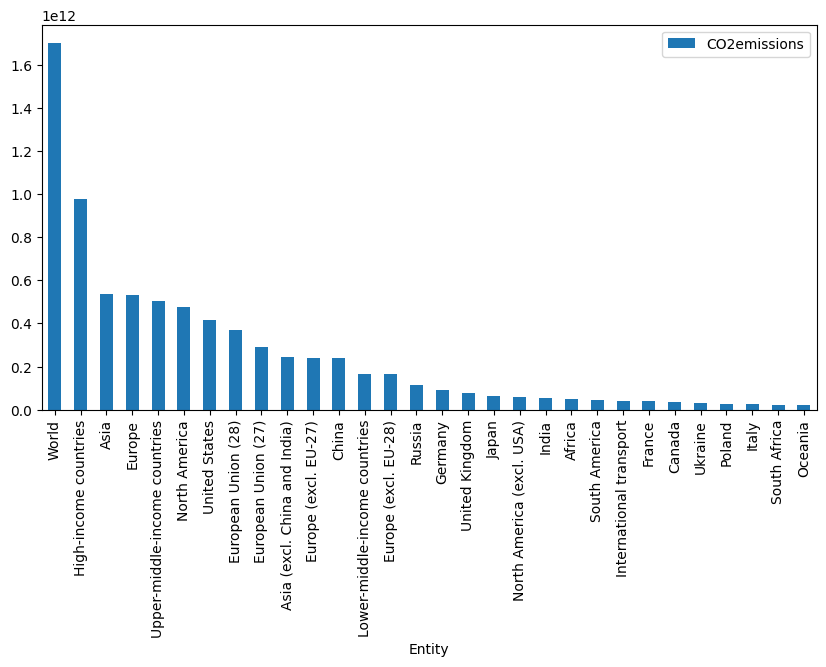

In [ ]:
cumulative_co2[cumulative_co2['Year']==2020].sort_values(by='CO2emissions', ascending=False).head(30).plot.bar(x='Entity',y='CO2emissions',figsize=(10,5))

United States and China are outstanding. 5 top countries seem to have huge influence and impact to the world.

#### Time series of cumulative CO2 emission of top 5 countries

In [ ]:
cumulative_co2_top5=cumulative_co2[(cumulative_co2['Entity']=='United States')|(cumulative_co2['Entity']=='China')|(cumulative_co2['Entity']=='Russia')|
           (cumulative_co2['Entity']=='Germany')|(cumulative_co2['Entity']=='United Kingdom')]

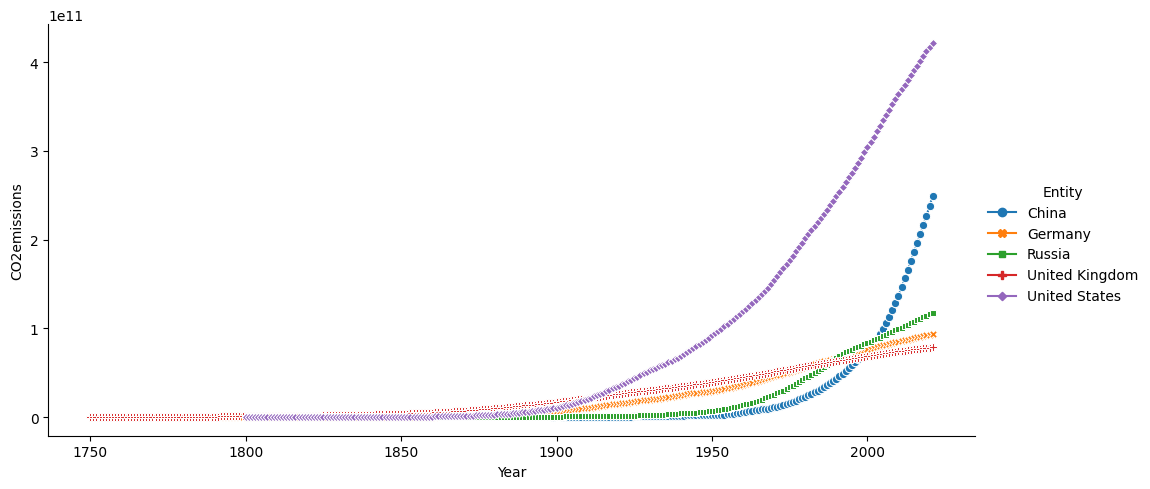

In [ ]:
ax=sns.relplot(x="Year", y="CO2emissions", 
            data=cumulative_co2_top5, kind="line", 
            hue="Entity", style="Entity",
            markers=True, dashes=False,height=5, aspect=2)

Cumulative CO2 emission of United States began to incerese rapidly early 1900s, and that of china began to incerese rapidly late 1900s.

#### Time series of Cumulative CO2 Emission per person in 2020 ( exclusing United States, China, Russia, Germany and United Kingdom )

In [ ]:
cumulative_co2_others=cumulative_co2[(cumulative_co2['Entity']=='Estonia')|(cumulative_co2['Entity']=='Luxembourg')|(cumulative_co2['Entity']=='Belgium')|
           (cumulative_co2['Entity']=='Trinidad and Tobago')|(cumulative_co2['Entity']=='Brunei')|(cumulative_co2['Entity']=='Canada')]

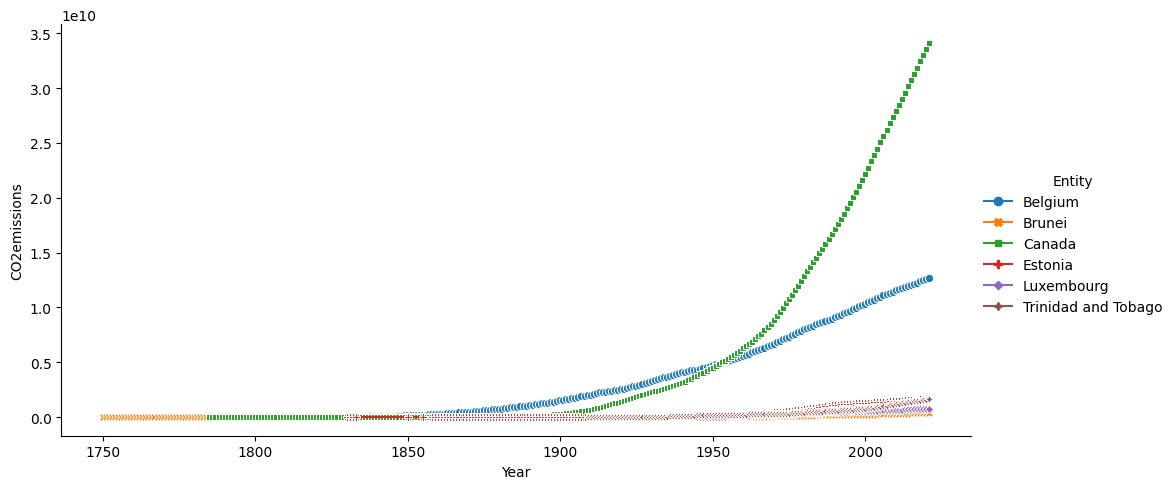

In [ ]:
ax=sns.relplot(x="Year", y="CO2emissions", 
            data=cumulative_co2_others, kind="line", 
            hue="Entity", style="Entity",
            markers=True, dashes=False,height=5, aspect=2)

Canada and Belgium have been increasing larger than other 4 countries very much. So I also tried to focus on Estonia, Luxembourg, Trinidad and Tobago and Brunei.

Estonia, Luxembourg, Trinidad and Tobago and Brunei have been also increasing rapidly since around 1950. It may have some relationship with industrization which increase income.

#### Case Study - Brunei

Brunei is a small nation on the island of Borneo, in 2 distinct sections surrounded by Malaysia and the South China Sea. It's known for its beaches and biodiverse rainforest, much of it protected within reserves. Why is Cumulative CO2 Emission per person in 2020 of Brunei so high ?

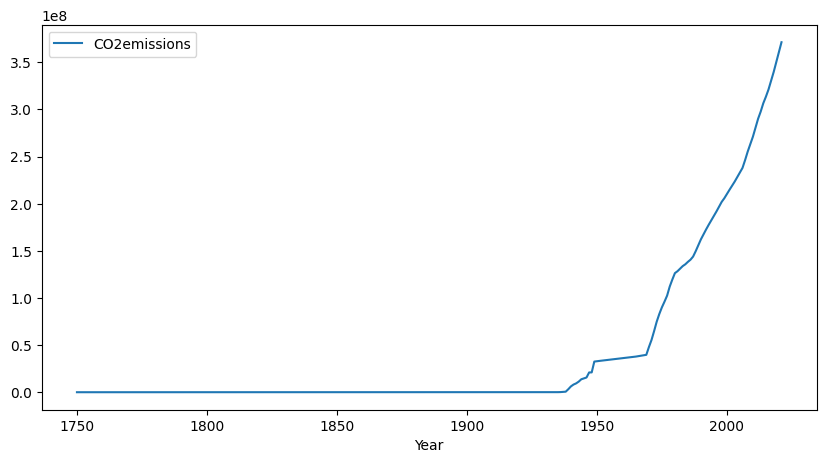

In [ ]:
cumulative_co2[cumulative_co2['Entity']=='Brunei'].plot(x='Year',y='CO2emissions',figsize=(10,5));

Around 1950, cumulative CO2 emission of Brunei began to rise rapidly. What caused this ?

According to Britannica,

Brunei’s economy is almost totally dependent on the exploitation of its vast reserves of petroleum and natural gas. Although oil and gas revenues have allowed the state to give its citizens one of the highest per capita incomes in Asia, they also have made the country dependent on a single commodity that is subject to market fluctuations. In addition, Brunei must rely on imports for nearly all its manufactured goods and most of its food. In an effort to ensure the country’s economic stability, the government has since the late 20th century striven to diversify the economy by developing other sectors, such as agriculture, fisheries, tourism, and financial services.

## What Causes **Climate Change**?

Climate change can be caused gradually by natural processes or suddenly by large events, such as a massive meteorite strike or volcanic activity. However, the rapid climate change we are experiencing now is due to three main human activities:

* Burning fossil fuels for heating and cooking, generating electricity and powering vehicles releases carbon dioxide into the atmosphere.


### **Global** CO2 emissions from fossil fuels and land use change

In this chart, we observe the trajectory of global emissions from the mid-18th century to the present day.

It is evident that while emissions stemming from fossil fuels have shown a consistent upward trend, emissions resulting from land use change have exhibited a minor decline in recent years. Consequently, the net effect has been a relatively stable total emissions trend over the past decade.

In [10]:
# Update the file name accordingly
file_name = 'global-co2-fossil-plus-land-use.csv'

# Load the dataset
file_path = os.path.join(dataset_path, file_name)

# read in the data
global_co2_fossil_land = pd.read_csv(file_path, header=0)
global_co2_fossil_land.head()

,Entity,Code,Year,Annual CO₂ emissions,Annual CO₂ emissions including land-use change,Annual CO₂ emissions from land-use change
0,Afghanistan,AFG,1850,NaN,NaN,2931200.0
1,Afghanistan,AFG,1851,NaN,NaN,2967840.0
2,Afghanistan,AFG,1852,NaN,NaN,2967840.0
3,Afghanistan,AFG,1853,NaN,NaN,3004480.0
4,Afghanistan,AFG,1854,NaN,NaN,3004480.0


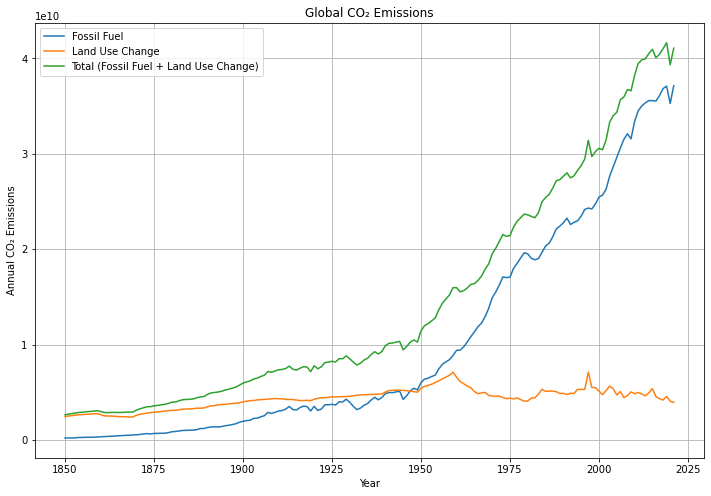

In [38]:
# Create a DataFrame from the data
global_co2_fossil_land = pd.DataFrame(global_co2_fossil_land)
world_data = global_co2_fossil_land[global_co2_fossil_land['Entity']=='World']

# Extract the Year and Annual CO₂ emissions from land-use change values
years = np.array(world_data['Year'])
emissions_fossil_fuel = np.array(world_data['Annual CO₂ emissions including land-use change'] - world_data['Annual CO₂ emissions from land-use change'])
emissions_land_use_change = np.array(world_data['Annual CO₂ emissions from land-use change'])
emissions_total = np.array(world_data['Annual CO₂ emissions including land-use change'])

plt.figure(figsize=(12, 8))  # Adjust the values as needed

# Create the line graph for global CO₂ emissions
plt.plot(years, emissions_fossil_fuel, linestyle='-', label='Fossil Fuel')
plt.plot(years, emissions_land_use_change, linestyle='-', label='Land Use Change')
plt.plot(years, emissions_total, linestyle='-', label='Total (Fossil Fuel + Land Use Change)')
plt.title('Global CO₂ Emissions')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ Emissions')
plt.grid(True)
plt.legend()

plt.show()

# Fossil Fuel and land use change in US

In [12]:
cols = [
    'Annual CO₂ emissions','Annual CO₂ emissions including land-use change','Annual CO₂ emissions from land-use change'
]
highlight = 'Annual CO₂ emissions including land-use change'

us_data = global_co2_fossil_land[global_co2_fossil_land['Entity']=='United States']
us_data.set_index('Year', inplace=True)

xmax = us_data.index.max()
xmin = xmax - 100

title = 'Fossil Fuel and Land Use Change in US from {} to {}'.format(xmin, xmax)

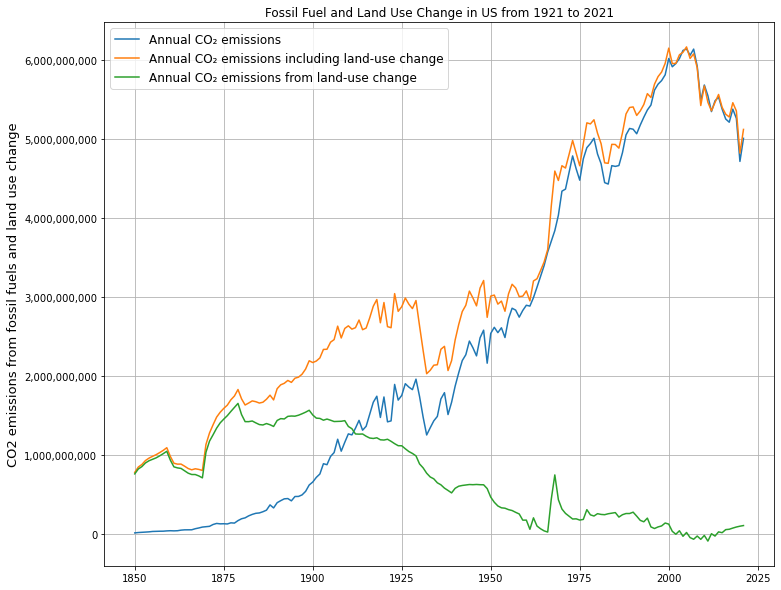

In [40]:
ax = us_data[cols].plot(figsize=(12, 10), title=title)

ax.yaxis.set_major_formatter(
    mpl.ticker.FuncFormatter(lambda val, p: format(int(val), ',')))

ax.set_ylabel('CO2 emissions from fossil fuels and land use change', fontsize=13)
ax.set_xlabel('', visible=False)
ax.legend(loc=2, prop={'size': 12})
ax.grid(True)
### to do some annotate
# plt.annotate(
#     'Dot-com bust', 
#     xy=(2000, df_us.ix[2000][highlight]),
#     xytext=(0, 5),
#     textcoords='offset points',
#     ha='center',
#     va='bottom',
#     size=11)

# plt.annotate(
#     'Financial crisis', 
#     xy=(2007, df_us.ix[2007][highlight]),
#     xytext=(0, 5),
#     textcoords='offset points',
#     ha='center',
#     va='bottom',
#     size=11)

### to save the graph to file as png
# plt.savefig('img/income-share-top-us-{}-{}.png'.format(xmin, xmax), bbox_inches='tight')

## Who causes **Climate Change**?

Around 1% of the greenhouse gases attributed to global warming are believed to have originated from the 50 least developed countries. In contrast, the contributions from the USA, the EU, and China alone account for approximately 60%.

In [14]:
file_name = 'share-of-cumulative-co2.csv'

# Load the dataset
file_path = os.path.join(dataset_path, file_name)

# read in the data
share_co2 = pd.read_csv(file_path, header=0)
share_co2 = pd.DataFrame(share_co2)
share_co2.head()

,Entity,Code,Year,Share of global cumulative CO₂ emissions
0,Afghanistan,AFG,1949,0.000007
1,Afghanistan,AFG,1950,0.000043
2,Afghanistan,AFG,1951,0.000080
3,Afghanistan,AFG,1952,0.000116
4,Afghanistan,AFG,1953,0.000155


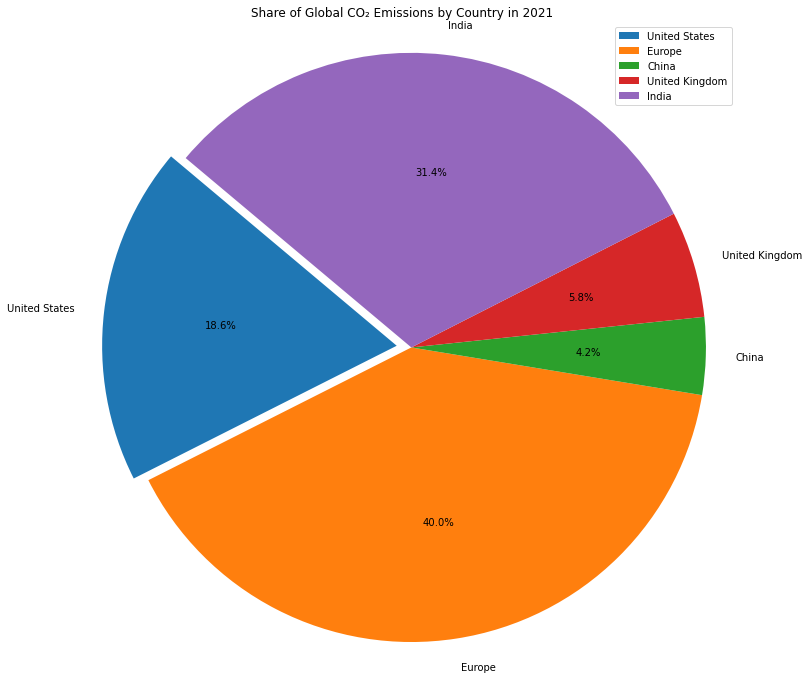

In [51]:
countries = ['United States', 'Europe', 'China', 'United Kingdom', 'India']
share_co2_2021 = share_co2[share_co2['Entity'].isin(countries) & (share_co2['Year'] == 2021)]
share = share_co2_2021['Share of global cumulative CO₂ emissions']

# Explode the most significant section (United States)
explode = (0.05, 0, 0, 0, 0)

# Plotting the pie chart
plt.figure(figsize=(12, 12), facecolor='w')
plt.pie(share, labels=countries,explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Share of Global CO₂ Emissions by Country in 2021')
plt.legend()

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.show()